<a href="https://colab.research.google.com/github/jasen8651/python001/blob/master/python_25_naver_movie_word_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

colab 환경설정

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (6,383 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [2]:
## 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

#  경로 변경
%cd /content/drive/MyDrive/python_demo

Mounted at /content/drive
/content/drive/MyDrive/python_demo


In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

import pandas as pd

from tqdm import tqdm_notebook
import re

## Naver 영화 - 평점순 영화별 제목, 리뷰, 장르 크롤링 Crawling

https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20221215

### 읽어오는 데이터의 진행률을 볼 때

- tqdm_notebook 사용

In [4]:
story = []
title = []
genre = []

for i in tqdm_notebook(range(1, 2)) :
  url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20221215&page=' + str(i)
  html = urlopen(url)
  soup = BeautifulSoup(html, 'lxml')
  # print(soup)
  # print(type(soup))
  # break

  titles = soup.find_all('div', class_ = 'tit5') # attrs = {'class' : 'tit5'}
  hype = []
  href = []

  try :
    for each in titles :
      hype = each.find_all('a')
      for link in hype :
        # print(link)
        # print(type(link))
        href.append(link['href'])
        # print(type(href)) # list
    
    for j in tqdm_notebook(range(len(href))) :
      domain = 'https://movie.naver.com'
      domain = domain + href[j]

      # print(domain)

      html = urlopen(domain)
      soup = BeautifulSoup(html, 'lxml')

      genre_list = soup.select('dl.info_spec dd > p > span:nth-of-type(1) > a')
      #print(genre_list)
      genre_text = []
      for i in range(len(genre_list)) :
        genre_text.append(genre_list[i].get_text())
      genre.append(genre_text)
      #print(genre)

      title_list = soup.select_one('h3.h_movie > a')
      # print(title_list)
      
      title.append(soup.select_one('h3.h_movie > a').get_text())

      story.append(soup.find('p', class_ = 'con_tx').get_text())

  except :
    pass

# print(title)
# print(genre)
# print(story)

# 줄거리 정규화 처리
for i in range(len(story)) :
    story[i] = re.sub( '\{[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》“”’]\}', '', story[ i ] )
    # select_one()와 select() 로 텍스트를 가져오면 <br>은 '\r'로, 공백은 '\xa0'로 가져온다.
    story[i] = re.sub( '\r\xa0', '', story[ i ] )
    
    print(story[i])

<ipython-input-4-a16815c6380a>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(1, 2)) :


  0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-4-a16815c6380a>:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tqdm_notebook(range(len(href))) :


  0%|          | 0/50 [00:00<?, ?it/s]

최고의 파일럿이자 전설적인 인물 매버릭(톰 크루즈)은 자신이 졸업한 훈련학교 교관으로 발탁된다.그의 명성을 모르던 팀원들은 매버릭의 지시를 무시하지만 실전을 방불케 하는 상공 훈련에서 눈으로 봐도 믿기 힘든 전설적인 조종 실력에 모두가 압도된다.매버릭의 지휘아래 견고한 팀워크를 쌓아가던 팀원들에게 국경을 뛰어넘는 위험한 임무가 주어지자매버릭은 자신이 가르친 동료들과 함께 마지막이 될 지 모를 하늘 위 비행에 나서는데…
언제나 화면 정 중앙에 비춰지며 스포트라이트를 한 몸에 받는 스타, ‘트바로티’ 김호중. 하지만 그가 담긴 ‘틀’의 바깥에는 구석지고 어두운, 그럼에도 불구하고 아름다운 또 다른 이야기가 있다.  김호중의 두 번째 극장 영화 <인생은 뷰티풀: 비타돌체>는 틀 바깥으로 잘려 버린 이야기, 사람들의 시선에 갇혀 보이지 않았던 청년 김호중의 이야기, 그리고 그것에서 벗어나려는 가수 김호중의 진솔한 목소리를 전한다.  공연 실황 다큐멘터리 <인생은 뷰티풀: 비타돌체>에서는 오직 이 영화만을 위해 무대를 꾸민 김호중 단독 공연을 최초 공개한다.  트로트 가수 김호중이라는 고정관념에서 벗어나 처음 음악에 대한 열정을 갖게 해 준 클래식 음악들로 구성되어 그의 웅장한 목소리를 생생하게 감상 할 수 있다.  여기에 꿈 많은 스무 살, 음악에 대한 동경으로 떠났던 이탈리아를 다시 찾는 김호중의 다큐 여행기와 버스킹 공연까지 모두 담아 김호중이 그동안 전하고 싶었던 이야기들, 불안하고 가슴 아프기도 했던 속내까지 그의 인생이 <인생은 뷰티풀: 비타돌체>에 모두 담긴다.  김호중이 들려주는 음악 이야기는 모두의 가슴에 깊은 여운과 감동을 선사할 것이다.
편지 6천 통을 배달하라고요? 소통은커녕 싸움만 일삼는 마을에서요? 불가능해 보이는 임무에 좌절한 우체부. 그냥 포기하려던 차, 장난감 장인을 만나 아이디어가 떠오른다. 아이들에게 장난감을 줄 테니 편지를 쓰라고 하는 거야!
아흔 셋, 나의 사랑하는 할머니가 자살을 시도했다.  취업준비를 하며 보내던 어느 날,  나

In [5]:
# 줄거리 정규화 처리
for i in range(len(story)) :
    story[i] = re.sub( '[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》{}“”’]', '', story[ i ] )
    # select_one()와 select() 로 텍스트를 가져오면 <br>은 '\r'로, 공백은 '\xa0'로 가져온다.
    story[i] = re.sub( '\r\xa0', '', story[ i ] )
    
    print(story[i])

최고의 파일럿이자 전설적인 인물 매버릭톰 크루즈은 자신이 졸업한 훈련학교 교관으로 발탁된다그의 명성을 모르던 팀원들은 매버릭의 지시를 무시하지만 실전을 방불케 하는 상공 훈련에서 눈으로 봐도 믿기 힘든 전설적인 조종 실력에 모두가 압도된다매버릭의 지휘아래 견고한 팀워크를 쌓아가던 팀원들에게 국경을 뛰어넘는 위험한 임무가 주어지자매버릭은 자신이 가르친 동료들과 함께 마지막이 될 지 모를 하늘 위 비행에 나서는데
언제나 화면 정 중앙에 비춰지며 스포트라이트를 한 몸에 받는 스타 트바로티 김호중 하지만 그가 담긴 틀의 바깥에는 구석지고 어두운 그럼에도 불구하고 아름다운 또 다른 이야기가 있다  김호중의 두 번째 극장 영화 인생은 뷰티풀 비타돌체는 틀 바깥으로 잘려 버린 이야기 사람들의 시선에 갇혀 보이지 않았던 청년 김호중의 이야기 그리고 그것에서 벗어나려는 가수 김호중의 진솔한 목소리를 전한다  공연 실황 다큐멘터리 인생은 뷰티풀 비타돌체에서는 오직 이 영화만을 위해 무대를 꾸민 김호중 단독 공연을 최초 공개한다  트로트 가수 김호중이라는 고정관념에서 벗어나 처음 음악에 대한 열정을 갖게 해 준 클래식 음악들로 구성되어 그의 웅장한 목소리를 생생하게 감상 할 수 있다  여기에 꿈 많은 스무 살 음악에 대한 동경으로 떠났던 이탈리아를 다시 찾는 김호중의 다큐 여행기와 버스킹 공연까지 모두 담아 김호중이 그동안 전하고 싶었던 이야기들 불안하고 가슴 아프기도 했던 속내까지 그의 인생이 인생은 뷰티풀 비타돌체에 모두 담긴다  김호중이 들려주는 음악 이야기는 모두의 가슴에 깊은 여운과 감동을 선사할 것이다
편지 6천 통을 배달하라고요 소통은커녕 싸움만 일삼는 마을에서요 불가능해 보이는 임무에 좌절한 우체부 그냥 포기하려던 차 장난감 장인을 만나 아이디어가 떠오른다 아이들에게 장난감을 줄 테니 편지를 쓰라고 하는 거야
아흔 셋 나의 사랑하는 할머니가 자살을 시도했다  취업준비를 하며 보내던 어느 날  나의 가족이자 오랜 친구인 할머니가 먼 곳으로 떠나려 했다는 소식을 듣게 

In [6]:
print(len(title))
print(len(genre))
print(len(story))

50
50
50


Selenium
- 1개 : find_element( )
- 여러개 : find_elements( ) 

BeautifulSoup
- 요소 1개 : find( )
- 요소 여러개 : find_all( )

- select 1개 : select_one( )
- select 여러개 : select( )

예외 발생

try

except

else

finally

raise




### Pandas DataFrame 생성

In [7]:
movie = pd.DataFrame(data = {'title' : title, 'story' : story, 'genre' : genre})
movie.shape

(50, 3)

In [8]:
movie.head()

,title,story,genre
0,탑건: 매버릭,최고의 파일럿이자 전설적인 인물 매버릭톰 크루즈은 자신이 졸업한 훈련학교 교관으로 ...,[액션]
1,인생은 뷰티풀: 비타돌체,언제나 화면 정 중앙에 비춰지며 스포트라이트를 한 몸에 받는 스타 트바로티 김호중 ...,"[공연실황, 다큐멘터리]"
2,클라우스,편지 6천 통을 배달하라고요 소통은커녕 싸움만 일삼는 마을에서요 불가능해 보이는 임...,"[애니메이션, 코미디, 가족]"
3,할머니의 먼 집,아흔 셋 나의 사랑하는 할머니가 자살을 시도했다 취업준비를 하며 보내던 어느 날 ...,[다큐멘터리]
4,밥정,잔디 잡초 이끼 나뭇가지 자연을 재료 삼아 요리를 만드는 방랑식객 임지호 셰프 친...,"[다큐멘터리, 드라마]"


In [9]:
movie.tail()

,title,story,genre
45,헌터 킬러,미 국방부는 격침당한 잠수함의 행방을 찾기 위해 헌터 킬러를 극비리에 투입시키고 캡...,"[액션, 스릴러]"
46,반지의 제왕: 왕의 귀환,모든 힘을 지배할 악의 군주 사우론의 절대반지가 깨어나고 악의 세력이 세상을 지배해...,"[판타지, 모험, 액션, 전쟁]"
47,죽은 시인의 사회,미국 입시 명문고 웰튼 아카데미공부가 인생의 전부인 학생들이아이비리그로 가기 위해 ...,[드라마]
48,히든 피겨스,천부적인 수학 능력의 흑인 여성 캐서린 존슨NASA 흑인 여성들의 리더이자 프로그래...,[드라마]
49,어벤져스: 엔드게임,인피니티 워 이후 절반만 살아남은 지구 마지막 희망이 된 어벤져스 먼저 떠난 그들을...,"[액션, SF]"


In [10]:
import numpy as np

genre_list = np.concatenate(movie['genre']).tolist()
print(genre_list) # list

genres_list = set(genre_list)
print(genres_list) # set 중복값 x

['액션', '공연실황', '다큐멘터리', '애니메이션', '코미디', '가족', '다큐멘터리', '다큐멘터리', '드라마', '드라마', '드라마', '모험', '코미디', '드라마', '드라마', '드라마', '전쟁', '애니메이션', '모험', '애니메이션', '드라마', '판타지', '드라마', '액션', 'SF', '모험', '액션', '전쟁', '드라마', '멜로/로맨스', '액션', '드라마', '다큐멘터리', '드라마', 'SF', '액션', '스릴러', '드라마', '멜로/로맨스', '드라마', '전쟁', '액션', '드라마', '모험', '범죄', '가족', '코미디', '공연실황', '공연실황', '다큐멘터리', '애니메이션', 'SF', '가족', '코미디', '멜로/로맨스', '모험', 'SF', '코미디', '멜로/로맨스', '뮤지컬', '드라마', '드라마', '애니메이션', '드라마', '코미디', '멜로/로맨스', '드라마', '액션', '드라마', '드라마', '뮤지컬', '드라마', '코미디', '범죄', '미스터리', '스릴러', '코미디', '드라마', 'SF', '액션', '드라마', '애니메이션', '판타지', '모험', '가족', '액션', '코미디', '드라마', '모험', '다큐멘터리', '드라마', '애니메이션', '모험', '코미디', '가족', '판타지', '드라마', '전쟁', '액션', '스릴러', '판타지', '모험', '액션', '전쟁', '드라마', '드라마', '액션', 'SF']
{'모험', '공연실황', '액션', '애니메이션', '뮤지컬', '멜로/로맨스', '미스터리', '스릴러', '전쟁', '드라마', 'SF', '범죄', '코미디', '판타지', '가족', '다큐멘터리'}


### 전체 장르에 대한 코드 부여

In [11]:
genre_code_list_dict = dict((c, i) for i, c in enumerate(genres_list))
genre_code_list_dict

{'모험': 0,
 '공연실황': 1,
 '액션': 2,
 '애니메이션': 3,
 '뮤지컬': 4,
 '멜로/로맨스': 5,
 '미스터리': 6,
 '스릴러': 7,
 '전쟁': 8,
 '드라마': 9,
 'SF': 10,
 '범죄': 11,
 '코미디': 12,
 '판타지': 13,
 '가족': 14,
 '다큐멘터리': 15}

In [12]:
# 전체 장르 수
max_genre_code_length = len(genre_code_list_dict)
max_genre_code_length

16

In [13]:
movie['genre_code'] = [[genre_code_list_dict[x] for x in element]  for element in movie['genre']]
movie.head()

,title,story,genre,genre_code
0,탑건: 매버릭,최고의 파일럿이자 전설적인 인물 매버릭톰 크루즈은 자신이 졸업한 훈련학교 교관으로 ...,[액션],[2]
1,인생은 뷰티풀: 비타돌체,언제나 화면 정 중앙에 비춰지며 스포트라이트를 한 몸에 받는 스타 트바로티 김호중 ...,"[공연실황, 다큐멘터리]","[1, 15]"
2,클라우스,편지 6천 통을 배달하라고요 소통은커녕 싸움만 일삼는 마을에서요 불가능해 보이는 임...,"[애니메이션, 코미디, 가족]","[3, 12, 14]"
3,할머니의 먼 집,아흔 셋 나의 사랑하는 할머니가 자살을 시도했다 취업준비를 하며 보내던 어느 날 ...,[다큐멘터리],[15]
4,밥정,잔디 잡초 이끼 나뭇가지 자연을 재료 삼아 요리를 만드는 방랑식객 임지호 셰프 친...,"[다큐멘터리, 드라마]","[15, 9]"


### csv로 저장하기

In [14]:
movie.to_csv('./data_crowing/movie_revirew.csv')

In [15]:
genre_list_cnt = np.zeros(16)
print(genre_list_cnt)

for data in movie['genre_code'] :
  for x in data :
    genre_list_cnt[x] += 1

print(genre_list_cnt)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 9.  3. 12.  7.  2.  5.  1.  3.  5. 28.  6.  2. 10.  4.  5.  6.]


In [18]:
tags = [ (i,j) for i, j in zip(genre_code_list_dict.keys(),genre_list_cnt)]
tags

[('모험', 9.0),
 ('공연실황', 3.0),
 ('액션', 12.0),
 ('애니메이션', 7.0),
 ('뮤지컬', 2.0),
 ('멜로/로맨스', 5.0),
 ('미스터리', 1.0),
 ('스릴러', 3.0),
 ('전쟁', 5.0),
 ('드라마', 28.0),
 ('SF', 6.0),
 ('범죄', 2.0),
 ('코미디', 10.0),
 ('판타지', 4.0),
 ('가족', 5.0),
 ('다큐멘터리', 6.0)]

In [37]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

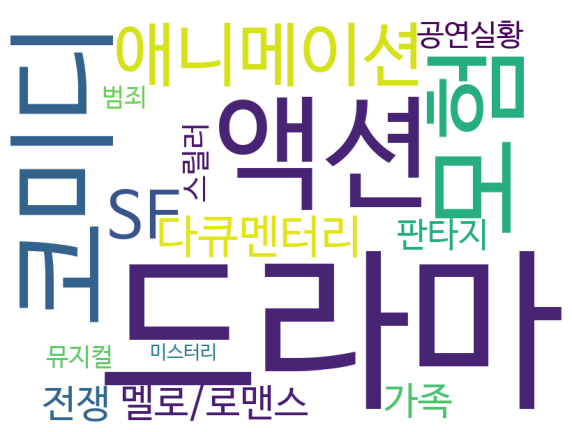

In [43]:
wordcloud = WordCloud(font_path='NanumBarunGothic', background_color='white', width=800, height=600)
cloud = wordcloud.generate_from_frequencies(dict(tags))
#print(cloud)
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()